## Gradient Boosting

### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix 

### Prepare data

In [2]:
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

test_features = pd.read_csv('test_features.csv')
test_labels = pd.read_csv('test_labels.csv')

Survived = ['Not survived','Survived']

### Train model

#### Optimize the Gradient Boosting Model

In [3]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
        
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

best_gb=cv.best_estimator_

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}

0.624 (+/-0.006) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.788 (+/-0.059) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.805 (+/-0.058) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.816 (+/-0.065) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.624 (+/-0.006) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.803 (+/-0.044) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.817 (+/-0.036) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.822 (+/-0.034) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.006) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.801 (+/-0.055) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.834 (+/-0.04) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.82 (+/-0.033) for {'learning_ra

### Test Model

#### Visualize the Confusion Matrix

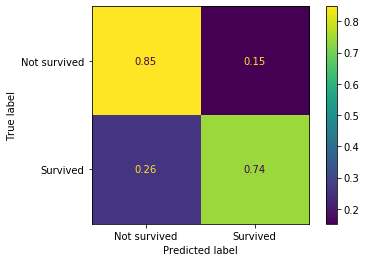

In [4]:
plot_confusion_matrix(
    best_gb, test_features, test_labels,
    display_labels=Survived,
    normalize='true')

#### Caluate the accuracy of the test data

In [5]:
print(
    'Accuracy on testing data: ' 
    + str("{:.2%}".format(best_gb.score(test_features, test_labels))))

Accuracy on testing data: 80.45%
